# ***PREDICCIÓN DE ACTOS DELICTIVOS - CHICAGO***

## Alumnos:

### `Noelia García`

### `Carlos Astorga`

### `Ramón Denia`

# ***PREDICCIÓN***

---

Importación de las librerias necesarias para realizar la predicción y analisis de las variables. Estas librerias se han ido nutriendo segun avanzaba el codigo

In [97]:
#pip install tensorflow

In [98]:
#Librerias
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import calendar


import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from datetime import datetime
import time
from time import sleep
%matplotlib inline
plt.style.use('seaborn')

from numpy import arange
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.feature_selection import RFECV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error

Cargar los datos con los que se cuenta y crear la variable "dataset" que engloba todos los datos.

In [99]:
dataset = pd.read_csv ('DATASET CHICAGO.csv', low_memory = False, encoding="ISO-8859-1")
#Hemos hecho un low_memory=False, porque nos daba problemas a la hora de interpretar el tipo de datos de algunas filas

Eliminamos los valores nulos de nuestro dataset

In [100]:
# Se eliminan los valores nulos
dataset.dropna(axis=0,inplace=True)

Agrupamos las variables del dataset tal y como hemos hecho en el **Notebook_Análisis**

In [101]:
dataset["Primary Type"] = dataset["Primary Type"].replace({
     "THEFT": "THEFT & ROBBERY", "BURGLARY": "THEFT & ROBBERY", "MOTOR VEHICLE THEFT": "THEFT & ROBBERY",
     "ROBBERY": "THEFT & ROBBERY", "BATTERY": "ASSAULT", "CRIM SEXUAL ASSAULT": "ASSAULT", "PROSTITUTION": "SEX CRIMES",
     "SEX OFFENSE": "SEX CRIMES", "CRIMINAL TRESPASS": "CRIMINAL DAMAGE", "ARSON": "CRIMINAL DAMAGE", "OTHER OFFENSE":
     "OTHER OFFENSES", "DECEPTIVE PRACTICE": "OTHER OFFENSES", "WEAPONS VIOLATION": "OTHER OFFENSES", "GAMBLING":
     "OTHER OFFENSES", "STALKING": "OTHER OFFENSES", "KIDNAPPING": "OTHER OFFENSES", "OBSCENITY": "OTHER OFFENSES",
     "INTIMIDATION": "OTHER OFFENSES", "RITUALISM": "OTHER OFFENSES", "HUMAN TRAFFICKING": "OTHER OFFENSES",
     "CONCEALED CARRY LICENSE VIOLATION": "OTHER OFFENSES", "NON-CRIMINAL (SUBJECT SPECIFIED)": "OTHER OFFENSES",
     "NON-CRIMINAL": "OTHER OFFENSES", "PUBLIC PEACE VIOLATION": "OTHER OFFENSES", "OFFENSE INVOLVING CHILDREN":
     "OTHER OFFENSES", "INTERFERENCE WITH PUBLIC OFFICER": "OTHER OFFENSES", "LIQUOR LAW VIOLATION": "OTHER OFFENSES",
     "NON - CRIMINAL": "OTHER OFFENSES", "OTHER NARCOTIC VIOLATION": "NARCOTICS", "PUBLIC INDECENCY": "OTHER OFFENSES",
     "HOMICIDE": "ASSAULT" })

In [102]:
dataset["Location Description"] = dataset['Location Description'].replace({"SIDEWALK":"STREET", "ALLEY":"STREET",
            "APARTMENT":"RESIDENCE","RESIDENCE-GARAGE":"RESIDENCE","RESIDENCE PORCH/HALLWAY": 
            "RESIDENCE", "RESIDENTIAL YARD (FRONT/BACK)":"RESIDENCE","CHA APARTMENT": "RESIDENCE",
            "CHA HALLWAY/STAIRWELL/ELEVATOR": "RESIDENCE","SMALL RETAIL STORE":"RETAIL OUTLET","DRUG STORE":
            "RETAIL OUTLET","GAS STATION":"RETAIL OUTLET","DEPARTMENT STORE":"RETAIL OUTLET","RETAIL STORES":
            "RETAIL OUTLET","RESTAURANT":"BUSINESS","BAR OR TAVERN":"BUSINESS","RESTAURANT":"BUSINESS","BANK":
            "BUSINESS","HOTEL/MOTEL":"BUSINESS","VEHICLE NON-COMMERCIAL":"VEHICLE","PARKING LOT":"PUBLIC BUILDING/GROUNDS",
            "SCHOOL, PUBLIC, BUILDING":"SCHOOL","PARK PROPERTY":"PUBLIC BUILDING/GROUNDS","CTA PLATFORM":
            "PUBLIC BUILDING/GROUNDS","CHA PARKING LOT/GROUNDS":"PUBLIC BUILDING/GROUNDS","SCHOOL, PUBLIC, GROUNDS":
            "SCHOOL", "CTA TRAIN":"PUBLIC BUILDING/GROUNDS","VACANT LOT/LAND":"PUBLIC BUILDING/GROUNDS",
            "GROCERY FOOD STORE":"RETAIL OUTLET","PUBLIC HIGH SCHOOL":"SCHOOL",'CTA "L" TRAIN':
            "PUBLIC BUILDING/GROUNDS","PARKING LOT/GARAGE(NON.RESID.)":"PUBLIC BUILDING/GROUNDS","CTA BUS":"VEHICLE",
            "TAVERN/LIQUOR STORE":"RETAIL OUTLET","HOSPITAL BUILDING/GROUNDS":"HOSPITAL",
            "POLICE FACILITY/VEH PARKING LOT":"POLICE BUILDING","CONVENIENCE STORE":
            "RETAIL OUTLET","CHURCH/SYNAGOGUE/PLACE OF WORSHIP":"CHURCH","GOVERNMENT BUILDING/PROPERTY":
            "FEDERAL BUILDING","SCHOOL, PRIVATE, BUILDING":"SCHOOL","GOVERNMENT BUILDING":
            "FEDERAL BUILDING","CONSTRUCTION SITE":"BUSINESS","WAREHOUSE":"BUSINESS","AIRCRAFT":"AIRPORT",
            "ABANDONED BUILDING":"OTHER","CTA GARAGE / OTHER PROPERTY":"PUBLIC BUILDING/GROUNDS","TAXICAB":"VEHICLE",
            "CTA BUS STOP":"PUBLIC BUILDING/GROUNDS","BARBERSHOP":"BUSINESS","CURRENCY EXCHANGE":"BUSINESS","LIBRARY":
            "PUBLIC BUILDING/GROUNDS","ATHLETIC CLUB":"PUBLIC BUILDING/GROUNDS","MEDICAL/DENTAL OFFICE":"BUSINESS",
            "FACTORY/MANUFACTURING BUILDING":"BUSINESS","COMMERCIAL / BUSINESS OFFICE":"BUSINESS","SCHOOL, PRIVATE, GROUNDS":
            "SCHOOL","CLEANING STORE":"RETAIL OUTLET","VEHICLE-COMMERCIAL":"VEHICLE","COLLEGE/UNIVERSITY GROUNDS":"SCHOOL",
            "DRIVEWAY - RESIDENTIAL":"RESIDENCE","SPORTS ARENA/STADIUM":"PUBLIC BUILDING/GROUNDS","CTA STATION":
            "PUBLIC BUILDING/GROUNDS","ATM (AUTOMATIC TELLER MACHINE)":"BUSINESS","DAY CARE CENTER":"SCHOOL","BUSINESS":
            "BUSINESS","CAR WASH":"BUSINESS","AUTO":"VEHICLE","COLLEGE/UNIVERSITY RESIDENCE HALL":"SCHOOL","MOVIE HOUSE/THEATER":
            "RETAIL OUTLET", "APPLIANCE STORE":"RETAIL OUTLET","HIGHWAY/EXPRESSWAY":"STREET","LAKEFRONT/WATERFRONT/RIVERBANK":
            "OTHER","AIRPORT TERMINAL UPPER LEVEL - SECURE AREA":"AIRPORT","AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA":
            "AIRPORT","AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA":"AIRPORT","AIRPORT VENDING ESTABLISHMENT":"AIRPORT",
            "AIRPORT TERMINAL LOWER LEVEL - SECURE AREA":"AIRPORT","AIRPORT BUILDING NON-TERMINAL - SECURE AREA":"AIRPORT",
            "DELIVERY TRUCK":"VEHICLE","ANIMAL HOSPITAL":"HOSPITAL","AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA":"AIRPORT",
            "AIRPORT PARKING LOT":"AIRPORT","OTHER COMMERCIAL TRANSPORTATION":"VEHICLE","VEHICLE - OTHER RIDE SERVICE":"VEHICLE",
            "CREDIT UNION":"BUSINESS","AIRPORT EXTERIOR - NON-SECURE AREA":"AIRPORT","HOUSE":"RESIDENCE","AIRPORT EXTERIOR - SECURE AREA":
            "AIRPORT", "POOL ROOM":"OTHER","COIN OPERATED MACHINE":"OTHER","PAWN SHOP":"OTHER","YARD":"OTHER","BOWLING ALLEY":"OTHER",
            "BOAT/WATERCRAFT":"OTHER","BRIDGE":"STREET","CEMETERY":"PUBLIC BUILDING/GROUNDS","FOREST PRESERVE":
            "OTHER","SAVINGS AND LOAN":"BUSINESS","VACANT LOT":"OTHER","GANGWAY":"AIRPORT","PUBLIC BUILDING/GROUND":"PUBLIC BUILDING/GROUNDS",
            "VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)":"VEHICLE","PORCH":"RESIDENCE","NEWSSTAND":"STREET","RETAIL STORE":"RETAIL OUTLET",
            "AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA":"AIRPORT","AIRPORT TRANSPORTATION SYSTEM (ATS)":"AIRPORT","HALLWAY":"OTHER",
            "VEHICLE - DELIVERY TRUCK":"VEHICLE","AUTO / BOAT / RV DEALERSHIP":"BUSINESS","CEMETARY":"PUBLIC BUILDING/GROUNDS","GARAGE":"OTHER",
            "CTA TRACKS - RIGHT OF WAY":"OTHER","CHA PARKING LOT":"PUBLIC BUILDING/GROUNDS","GAS STATION DRIVE/PROP.":"RETAIL OUTLET",
            "CHA GROUNDS":"PUBLIC BUILDING/GROUNDS","TAVERN":"BUSINESS","BASEMENT":"RESIDENCE","CHA HALLWAY":"RESIDENCE","OFFICE":"BUSINESS",
            "DRIVEWAY":"RESIDENCE","VESTIBULE":"OTHER","STAIRWELL":"OTHER","HOTEL":"BUSINESS","CLUB":"BUSINESS","OFFICE":"BUSINESS","BARBER SHOP/BEAUTY SALON":
            "BUSINESS","SCHOOL YARD":"SCHOOL","RAILROAD PROPERTY":"PUBLIC BUILDING/GROUNDS","PUBLIC GRAMMAR SCHOOL":"SCHOOL","TRUCK":"VEHICLE","TAXI CAB":
            "VEHICLE","DUMPSTER":"VEHICLE","MOTEL":"BUSINESS","CHA LOBBY":"PUBLIC BUILDING/GROUNDS","CHA STAIRWELL":"PUBLIC BUILDING/GROUNDS",
            "GARAGE/AUTO REPAIR":"BUSINESS","LIQUOR STORE":"RETAIL OUTLET","NURSING HOME":"HOSPITAL","CTA PROPERTY":"PUBLIC BUILDING/GROUNDS","TRAILER":"OTHER",
            "YMCA":"OTHER","LAKE":"OTHER","VEHICLE-COMMERCIAL - TROLLEY BUS":"VEHICLE","VEHICLE-COMMERCIAL - ENTERTAINMENT/PARTY BUS":"VEHICLE","RIVER":"OTHER",
            "KENNEL":"OTHER","FUNERAL PARLOR":"BUSINESS","BANQUET HALL":"OTHER","ROOMING HOUSE":"OTHER","LIVERY STAND OFFICE":"BUSINESS",
            "LAUNDRY ROOM":"OTHER","PRAIRIE":"OTHER","RIVER BANK":"OTHER","COACH HOUSE":"OTHER","SEWER":"OTHER","LAGOON":"OTHER","CLEANERS/LAUNDROMAT":"BUSINESS",
            "HORSE STABLE":"OTHER","FACTORY":"BUSINESS","CHA BREEZEWAY":"OTHER","CHA ELEVATOR":"PUBLIC BUILDING/GROUNDS","FARM":"OTHER","ELEVATOR":"OTHER",
            "POOLROOM":"OTHER","WOODED AREA":"OTHER","LOADING DOCK":"OTHER","TRUCKING TERMINAL":"OTHER","LIVERY AUTO":"BUSINESS","CHURCH PROPERTY":"CHURCH",
            "EXPRESSWAY EMBANKMENT":"STREET","CHA PLAY LOT":"PUBLIC BUILDING/GROUNDS",'CTA "L" PLATFORM':"PUBLIC BUILDING/GROUNDS","JUNK YARD/GARBAGE DUMP":
            "OTHER","COUNTY JAIL":"POLICE/FIRE STATION","JAIL / LOCK-UP FACILITY":"POLICE/FIRE STATION","POLICE BUILDING":"POLICE/FIRE STATION",
            "NURSING HOME/RETIREMENT HOME":"HOSPITAL", "FIRE STATION":"POLICE/FIRE STATION","OTHER RAILROAD PROP / TRAIN DEPOT":"PUBLIC BUILDING/GROUNDS","AIPORT/AIRCRAFT":
            "AIRPORT/AIRCRAFT","AIRPORT": "AIRPORT/AIRCRAFT","HOSPITAL":"PUBLIC BUILDING/GROUNDS","CHURCH":"OTHER","FEDERAL BUILDING":"PUBLIC BUILDING/GROUNDS",
            "POLICE/FIRE STATION":"PUBLIC BUILDING/GROUNDS","AIRPORT/AIRCRAFT":"PUBLIC BUILDING/GROUNDS","PUBLIC BUILDING/GROUNDS":"PUBLIC BLDG"                                        
            })

In [103]:
dataset['Date'] = pd.to_datetime(dataset['Date'], infer_datetime_format=True)

In [104]:
dataset["date"] = dataset["Date"].dt.date
dataset["year"] = dataset["Date"].dt.year
dataset["month"] = dataset["Date"].dt.month
dataset["day"] = dataset["Date"].dt.day
dataset["time"] = dataset["Date"].dt.time

In [105]:
dataset.size

218836975

In [106]:
dataset["Census Tracts"].unique()


array([277.,  17., 134., 247., 266., 529.,  33., 331., 712., 686.,  61.,
       231., 144., 703.,  31., 532., 495., 300., 285., 428., 404., 530.,
       286., 304., 383., 643., 267., 555., 764., 506., 172., 437., 557.,
       623., 449., 325., 167., 333., 202.,  81., 367., 512., 715., 368.,
       498., 429., 118., 156., 357., 609., 433., 340.,  38., 676., 229.,
       714., 675., 226., 546., 642., 194., 525., 671., 649., 696., 150.,
         1., 456., 177., 486.,  97., 592., 332., 481., 465., 122., 716.,
        71., 457., 396., 121., 253., 617., 507.,  50.,  25., 786.,  91.,
       492., 204., 225., 765., 588., 473., 791., 489., 594., 737., 240.,
       200., 254., 672., 509., 534.,  98., 478., 321., 166., 565., 652.,
       567., 497., 209., 322., 419., 416., 377., 244., 515., 400., 125.,
        85., 120., 513.,   7., 255., 777., 556., 756.,  29., 420., 452.,
       761., 626., 580., 496., 572., 448.,  69., 518.,  70., 736., 112.,
       138.,  77., 238., 135., 119., 171., 732., 49

In [107]:
for i in dataset.columns:
    print("La variable %s tiene lo siguientes valores únicos" %i)
    print(len(dataset[i].unique()))

La variable ID tiene lo siguientes valores únicos
6252485
La variable Case Number tiene lo siguientes valores únicos
6252084
La variable Date tiene lo siguientes valores únicos
2525607
La variable Block tiene lo siguientes valores únicos
35385
La variable IUCR tiene lo siguientes valores únicos
400
La variable Primary Type tiene lo siguientes valores únicos
6
La variable Description tiene lo siguientes valores únicos
378
La variable Location Description tiene lo siguientes valores únicos
14
La variable Arrest tiene lo siguientes valores únicos
2
La variable Domestic tiene lo siguientes valores únicos
2
La variable Beat tiene lo siguientes valores únicos
303
La variable District tiene lo siguientes valores únicos
24
La variable Ward tiene lo siguientes valores únicos
50
La variable Community Area tiene lo siguientes valores únicos
78
La variable FBI Code tiene lo siguientes valores únicos
26
La variable X Coordinate tiene lo siguientes valores únicos
74519
La variable Y Coordinate tiene

In [108]:
dataset.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Historical Wards 2003-2015', 'Zip Codes',
       'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes',
       'Police Districts', 'Police Beats', 'date', 'year', 'month', 'day',
       'time'],
      dtype='object')

### Selección de variables

Para seleccionar las variables optimas sera agruparlas en variables numericas y categoricas. Las variables categoricas son las que mas adelante se trasformaran

In [109]:
# Seleccion de variables categoricas y numericas
NUM_FEATURES = ["year"] 
CAT_FEATURES = ["Primary Type", "Location Description", "Arrest","District"]

In [110]:
dataset[NUM_FEATURES].dtypes

# Tipos de datos de las variables numericas

year    int64
dtype: object

In [111]:
dataset[CAT_FEATURES].dtypes

#Tipos de datos de las variables categoricas

Primary Type             object
Location Description     object
Arrest                     bool
District                float64
dtype: object

In [112]:
#Visualizan datos
dataset_num=dataset.loc[:, NUM_FEATURES]
dataset_cat=dataset.loc[:, CAT_FEATURES]
dataset_crimen = pd.concat([dataset_num, dataset_cat], axis=1)
dataset_crimen.head()

,year,Primary Type,Location Description,Arrest,District
0,2019,ASSAULT,RESIDENCE,True,7.0
1,2019,ASSAULT,RESIDENCE,True,18.0
2,2019,OTHER OFFENSES,PUBLIC BUILDING/GROUNDS,True,3.0
3,2019,CRIMINAL DAMAGE,RESIDENCE,False,6.0
4,2019,ASSAULT,RESIDENCE,False,8.0


Trasformación de variables

Vamos a pasar a numérico las variables categóricas que tenemos: `CAT_FEATURES = ["Primary Type", "Location Description", "Arrest","District"]`

La forma más utilizada para la transformación de variables categóricas a numéricas es utilizar one-hot-encoding. Esta transformación asigna únicamente 0 y 1 a las variables con diferentes registros, indicando 1 si la muestra se corresponde con el nivel y 0 en caso contrario. Utilizamos el comando: `get_dummies`. 

Es buena práctica, utilizar el comando `drop_first=True` porque de esta manera, eliminamos la primera columna de datos, que se da por evidente y evitamos de nuevo, aumentar la dimensionalidad del dataset.

Pero en ciertos casos, cuando consideramos que una variable es muy importante para nuestro estudio, pero nos aumenta la dimensionalidad de nuestro modelo en exceso, ralentizando y empeorando la eficacia del modelo, evitamos hacer esta transofrmacion. En este caso para las dos primeras variables categóricas, hemos decidido darle un valor correspondiente al número de veces que se repite dicho valor. Es decir, si en la variable categórica `Primary Type` aparece el valor *THEFT & ROBBERY* 2 millones de veces repetido sobre un total de 6,5 millones de datos que tenemos, le daremos su valor porcentual 

In [113]:
# Comprobamos de nuevo la cantidad de valores que tiene el atributo Primary Type

dataset_crimen['Primary Type'].value_counts()

THEFT & ROBBERY    2203600
ASSAULT            1570973
CRIMINAL DAMAGE     905138
OTHER OFFENSES      845195
NARCOTICS           645058
SEX CRIMES           82521
Name: Primary Type, dtype: int64

In [114]:
dataset_crimen['District'].unique()

array([ 7., 18.,  3.,  6.,  8., 10., 19.,  9., 11., 16., 20., 24., 14.,
       25.,  5.,  4.,  2., 17.,  1., 22., 12., 15., 31., 21.])

In [115]:
dataset_crimen["District"]=dataset_crimen["District"].replace({7.:"A", 
                                                               18.:"B",  
                                                               3.:"C",  
                                                               6.:"D",  
                                                               8.:"E", 
                                                               10.:"F", 
                                                               19.:"G",  
                                                               9.:"H", 
                                                               11.:"I", 
                                                               16.:"J", 
                                                               20.:"K", 
                                                               24.:"L", 
                                                               14.:"M",
                                                               25.:"N",  
                                                               5.:"O",  
                                                               4.:"P",  
                                                               2.:"Q", 
                                                               17.:"R",  
                                                               1.:"S", 
                                                               22.:"T", 
                                                               12.:"U", 
                                                               15.:"V", 
                                                               31.:"X", 
                                                               21.:"Y"})

In [116]:
# Comprobamos cuantos datos totales tenemos

dataset_crimen.shape

(6252485, 5)

In [117]:
# Realizamos la transformación de los datos

# dataset_crimen["Primary Type"]=dataset_crimen["Primary Type"].replace({"THEFT & ROBBERY":35.24, "ASSAULT":25.13, "CRIMINAL DAMAGE":14.48, "OTHER OFFENSES":13.52, "NARCOTICS":10.32, "SEX CRIMES":1.32})

In [118]:
dataset_crimen["Location Description"].value_counts()

STREET                     2391741
RESIDENCE                  2090360
PUBLIC BUILDING/GROUNDS     408717
RETAIL OUTLET               407859
BUSINESS                    290704
OTHER                       249178
SCHOOL                      181988
VEHICLE                     142755
HOSPITAL                     32395
POLICE BUILDING              16378
CHURCH                       13910
FEDERAL BUILDING             12691
AIRPORT                      11815
POLICE/FIRE STATION           1994
Name: Location Description, dtype: int64

In [119]:
dataset_crimen["Location Description"]=dataset_crimen["Location Description"].replace({"PUBLIC BUILDING/GROUNDS":"RESIDENCE",                  
"RETAIL OUTLET":"BUSINESS",
"SCHOOL" :"RESIDENCE",                                           
"HOSPITAL" :"RESIDENCE" ,                                  
"CHURCH":"RESIDENCE",                      
"FEDERAL BUILDING":"RESIDENCE" ,            
"AIRPORT" : "OTHER",
"POLICE/FIRE STATION" : "RESIDENCE",
"POLICE BUILDING":"RESIDENCE"})

In [120]:
dataset_crimen["Location Description"].value_counts()

RESIDENCE    2758433
STREET       2391741
BUSINESS      698563
OTHER         260993
VEHICLE       142755
Name: Location Description, dtype: int64

In [121]:
# Realizamos la transformación de los datos

# dataset_crimen["Location Description"]=dataset_crimen["Location Description"].replace({"STREET":38.25, "RESIDENCE":33.43, "PUBLIC BUILDING/GROUNDS":6.54, "RETAIL OUTLET":6.52, "BUSINESS":4.65, "OTHER":3.99, "SCHOOL":2.91, "VEHICLE":2.28, "HOSPITAL":0.52, "POLICE BUILDING":0.26, "CHURCH":0.22, "FEDERAL BUILDING":0.20, "AIRPORT":0.19, "POLICE/FIRE STATION":0.03})

In [122]:
# Vamos a guardar el atributo Arrest como variable para ejecutar el comando get_dummies

CAT_FEATURES_Encoded = ["Arrest","Location Description", "Primary Type","District"]

In [123]:
# Se trasforman las variables categoricas a numericas mediante el "dummies"

crimen_df = pd.get_dummies(dataset_crimen, columns = CAT_FEATURES_Encoded, drop_first=True)
crimen_df.head()

,year,Arrest_True,Location Description_OTHER,Location Description_RESIDENCE,Location Description_STREET,Location Description_VEHICLE,Primary Type_CRIMINAL DAMAGE,Primary Type_NARCOTICS,Primary Type_OTHER OFFENSES,Primary Type_SEX CRIMES,...,District_O,District_P,District_Q,District_R,District_S,District_T,District_U,District_V,District_X,District_Y
0,2019,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2019,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
crimen_df.columns 

# Muestra las columnas con las que cuenta el dataset un vez trasformados los datos

Index(['year', 'Arrest_True', 'Location Description_OTHER',
       'Location Description_RESIDENCE', 'Location Description_STREET',
       'Location Description_VEHICLE', 'Primary Type_CRIMINAL DAMAGE',
       'Primary Type_NARCOTICS', 'Primary Type_OTHER OFFENSES',
       'Primary Type_SEX CRIMES', 'Primary Type_THEFT & ROBBERY', 'District_B',
       'District_C', 'District_D', 'District_E', 'District_F', 'District_G',
       'District_H', 'District_I', 'District_J', 'District_K', 'District_L',
       'District_M', 'District_N', 'District_O', 'District_P', 'District_Q',
       'District_R', 'District_S', 'District_T', 'District_U', 'District_V',
       'District_X', 'District_Y'],
      dtype='object')

In [125]:
# Comprobamos que hemos eliminado las filas con valores nulos en la limpieza de variables

np.round((crimen_df.isnull().sum()/crimen_df.shape[0])*100, 2)

year                              0.0
Arrest_True                       0.0
Location Description_OTHER        0.0
Location Description_RESIDENCE    0.0
Location Description_STREET       0.0
Location Description_VEHICLE      0.0
Primary Type_CRIMINAL DAMAGE      0.0
Primary Type_NARCOTICS            0.0
Primary Type_OTHER OFFENSES       0.0
Primary Type_SEX CRIMES           0.0
Primary Type_THEFT & ROBBERY      0.0
District_B                        0.0
District_C                        0.0
District_D                        0.0
District_E                        0.0
District_F                        0.0
District_G                        0.0
District_H                        0.0
District_I                        0.0
District_J                        0.0
District_K                        0.0
District_L                        0.0
District_M                        0.0
District_N                        0.0
District_O                        0.0
District_P                        0.0
District_Q  

In [126]:
crimen_df["year"]

0          2019
1          2019
2          2019
3          2019
4          2019
           ... 
6954938    2001
6954940    2001
6954942    2001
6954944    2001
6954946    2001
Name: year, Length: 6252485, dtype: int64

In [127]:
# Vamos a usar un scaler para ajustar los valores numericos a las variables que hemos codificado en 0 y 1
# Usaremos RobustScaler dado que es el mejor escalador para este tipo de casos

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

crimen_df[["year"]] = scaler.fit_transform(crimen_df[["year"]])

In [128]:
crimen_df.head()

,year,Arrest_True,Location Description_OTHER,Location Description_RESIDENCE,Location Description_STREET,Location Description_VEHICLE,Primary Type_CRIMINAL DAMAGE,Primary Type_NARCOTICS,Primary Type_OTHER OFFENSES,Primary Type_SEX CRIMES,...,District_O,District_P,District_Q,District_R,District_S,District_T,District_U,District_V,District_X,District_Y
0,1.25,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.25,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.25,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.25,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.25,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


***PARA LA REALIZACIÓN DE LOS MODELOS DE CLASIFICACIÓN, HEMOS TENIDO QUE COGER UNA MUESTRA DE NUESTRO DATASET, DEBIDO A QUE NOSOTROS CARECEMOS DE LOS RECURSOS NECESARIOS PARA UN TRATAMIENTO FLUIDO DE LOS DATOS Y SU POSTERIOR ANÁLISIS.***

In [129]:
crimen_sample=crimen_df.sample(100000)

In [130]:
crimen_sample.shape

(100000, 34)

Dividiremos la muestra en un 75% entrenamiento y 25% test. 

In [131]:
X = crimen_sample.drop("Arrest_True", axis = 1)
variables = X.columns
X = X.values

y = crimen_sample["Arrest_True"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.25, stratify=y)

In [132]:
X.shape

(100000, 33)

In [133]:
y.shape

(100000,)

### Modelado | Gradient Boosting

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

Xgb_train=X_train
ygb_train=y_train
Xgb_test=X_test
ygb_test=y_test
variables_gb = variables

list_estimators = (10, 50, 100)

for n_estimators in list_estimators:
  gb = GradientBoostingClassifier(
      n_estimators=n_estimators,
      random_state = 0
  )
  gb.fit(Xgb_train, ygb_train)

In [135]:
for name, importance in zip(variables_gb, gb.feature_importances_):
  print(f"{name}: {importance:.2f}")

year: 0.00
Location Description_OTHER: 0.00
Location Description_RESIDENCE: 0.02
Location Description_STREET: 0.04
Location Description_VEHICLE: 0.00
Primary Type_CRIMINAL DAMAGE: 0.01
Primary Type_NARCOTICS: 0.73
Primary Type_OTHER OFFENSES: 0.06
Primary Type_SEX CRIMES: 0.06
Primary Type_THEFT & ROBBERY: 0.06
District_B: 0.00
District_C: 0.00
District_D: 0.00
District_E: 0.00
District_F: 0.00
District_G: 0.00
District_H: 0.00
District_I: 0.00
District_J: 0.00
District_K: 0.00
District_L: 0.00
District_M: 0.00
District_N: 0.00
District_O: 0.00
District_P: 0.00
District_Q: 0.00
District_R: 0.00
District_S: 0.00
District_T: 0.00
District_U: 0.00
District_V: 0.00
District_X: 0.00
District_Y: 0.00


In [136]:
print('Precisión Gradient Boosting train/test  {0:.3f}/{1:.3f}'
      .format(gb.score(Xgb_train, ygb_train), gb.score(Xgb_test, ygb_test)))

Precisión Gradient Boosting train/test  0.847/0.843


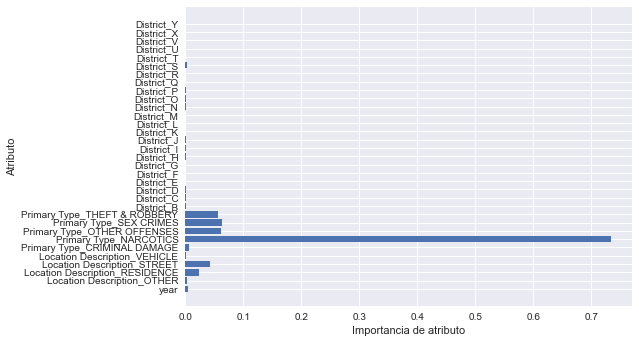

In [137]:
# Mostramos la importancia de cada atributo
n_atributos = 33
plt.barh(range(n_atributos), gb.feature_importances_, align='center')
plt.yticks(np.arange(n_atributos), variables_gb)
plt.xlabel("Importancia de atributo")
plt.ylabel("Atributo")
plt.show();

### Backward Elimination - Stepwise

Stepwise es una familia de métodos para la selección de características de forma iterativa. Una vez que eliminamos las variables, se comprueba la calidad de los modelos y se selecciona el mejor, en caso de que sea el original, el proceso termina, en caso de que sea otro, el proceso vuelve a comenzar.

- Backward elimination: lo que implica comenzar con todas las variables, comprobamos que pasa si eliminamos una característica utilizando un criterio para comparar el nuevo modelo con el anterior. 

Si al eliminar una variable en cada paso se mejora el modelo, se repetie este proceso hasta que al eliminar una variable no mejore el modelo.

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

rfe_feature_selector = RFECV(
    LogisticRegression(solver="liblinear"),
    cv = 5,
    scoring = "neg_log_loss", 
    n_jobs=-1,
).fit(Xgb_train, ygb_train)

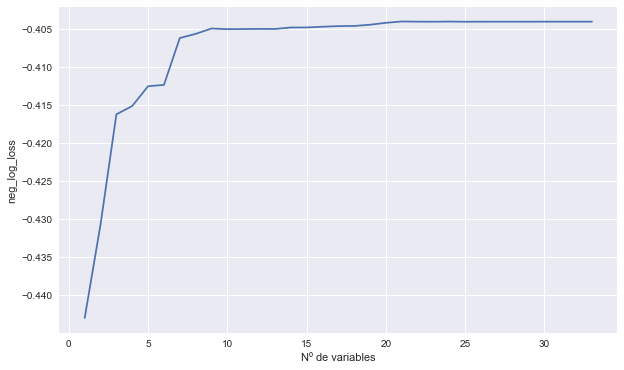

Variables a eliminar:
	District_B
	District_C
	District_D
	District_F
	District_H
	District_I
	District_N
	District_Q
	District_U
	District_V
	District_X
	District_Y


In [139]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel("neg_log_loss")
ax.set_xlabel("Nº de variables")
ax.plot(
    [i + 1 for i in range(Xgb_train.shape[1])],
    rfe_feature_selector.grid_scores_
)
plt.show()

print("Variables a eliminar:")
for feature in variables_gb[~rfe_feature_selector.support_]:
  print(f"\t{feature}")

In [140]:
Xgb_train = rfe_feature_selector.transform(Xgb_train)
variables_gb = variables_gb[rfe_feature_selector.support_]

## Optimización de hiperparámetros

Importamos la funcion extract_results para ver los resultados estadísticos (media y varianza) de la muestra, tanto en el set de entrenamiento como en el set de test de la optimización con el modelo GridSearch. 

In [141]:
def extract_results(search_estimator):
  """ Extrae los resultados de un optimizador de hiperparámetros.
  Args:
    search_estimator (object): GridSearchCV o RandomizedSearchCV ya entrenado.
  Returns:
    pd.DataFrame con los resultados sumarizados.
  """
  models = pd.DataFrame(search_estimator.cv_results_['params'])
  results = []
  for i in range(search_estimator.cv):
    partial = models.copy()
    partial["split"] = i
    partial["train_score"] = search_estimator.cv_results_[f'split{i}_train_score']
    partial["test_score"] = search_estimator.cv_results_[f'split{i}_test_score']
    results.append(partial)
  results = pd.concat(results, axis = 0)
  return results.groupby(list(models.columns)).agg({
      "train_score": ["mean", "var"], "test_score": ["mean", "var"]})

In [142]:
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

param_grid = {
    "n_estimators": [10, 20, 30],
    "min_samples_split": [2, 30, 60],
    "subsample": [1.0, 0.8, 0.6]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid = param_grid,
    cv = 5,
    verbose = 1,
    return_train_score = True,
    scoring = "neg_log_loss",
    n_jobs=-1
).fit(Xgb_train, ygb_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [143]:
extract_results(grid_search)

train_score               test_score  \
                                                mean           var       mean   
min_samples_split n_estimators subsample                                        
2                 10           0.6         -0.447415  1.805052e-06  -0.447457   
                               0.8         -0.448095  6.106960e-07  -0.448132   
                               1.0         -0.447103  4.741786e-06  -0.447071   
                  20           0.6         -0.414546  1.174950e-06  -0.414698   
                               0.8         -0.414594  2.702950e-06  -0.414791   
                               1.0         -0.414393  6.537040e-06  -0.414428   
                  30           0.6         -0.400912  1.525806e-06  -0.401264   
                               0.8         -0.403478  3.464095e-06  -0.403610   
                               1.0         -0.402453  6.309456e-06  -0.402615   
30                10           0.6         -0.447468  2.706185e-06  -0.447422   
                               0.8         -0.448051  5.512164e-07  -0.448084   
                               1.0         -0.447103  4.741786e-06  -0.447071   
                  20           0.6         -0.414498  5.497363e-06  -0.414537   
                               0.8         -0.414828  3.923067e-06  -0.415036   
                               1.0         -0.414393  6.537040e-06  -0.414428   
                  30           0.6         -0.401922  7.453661e-06  -0.402172   
                               0.8         -0.401711  5.115016e-06  -0.401871   
                               1.0         -0.402453  6.309456e-06  -0.402615   
60                10           0.6         -0.447350  1.725419e-06  -0.447330   
                               0.8         -0.446879  4.099700e-06  -0.446853   
                               1.0         -0.447103  4.741786e-06  -0.447071   
                  20           0.6         -0.415939  2.571379e-06  -0.416016   
                               0.8         -0.414254  3.563860e-06  -0.414324   
                               1.0         -0.414393  6.537040e-06  -0.414428   
                  30           0.6         -0.403133  4.147631e-06  -0.403386   
                               0.8         -0.400918  2.759744e-06  -0.401161   
                               1.0         -0.402453  6.309456e-06  -0.402615   

                                                    
                                               var  
min_samples_split n_estimators subsample            
2                 10           0.6        0.000007  
                               0.8        0.000005  
                               1.0        0.000006  
                  20           0.6        0.000017  
                               0.8        0.000017  
                               1.0        0.000015  
                  30           0.6        0.000015  
                               0.8        0.000007  
                               1.0        0.000016  
30                10           0.6        0.000005  
                               0.8        0.000005  
                               1.0        0.000006  
                  20           0.6        0.000010  
                               0.8        0.000013  
                               1.0        0.000015  
                  30           0.6        0.000017  
                               0.8        0.000011  
                               1.0        0.000016  
60                10           0.6        0.000007  
                               0.8        0.000006  
                               1.0        0.000006  
                  20           0.6        0.000007  
                               0.8        0.000008  
                               1.0        0.000015  
                  30           0.6        0.000028  
                               0.8        0.000008  
                               1.0        0.000016

In [144]:
print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor resultado: {grid_search.best_score_:.3f}")

Mejores parámetros: {'min_samples_split': 60, 'n_estimators': 30, 'subsample': 0.8}
Mejor resultado: -0.401


## Evaluación final del Gradient Boosting

In [145]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss

pipeline = Pipeline([
  ("rfe", rfe_feature_selector),
  ("estimator", grid_search)                      
])

In [146]:
ygb_test_pred = pipeline.predict_proba(Xgb_test)
print(f"Log loss test: {log_loss(ygb_test, ygb_test_pred):.3f}")

Log loss test: 0.406


In [147]:
ygb_test

2983905    1
2117523    0
3489948    0
13079      0
5486474    0
          ..
3688134    0
3158067    0
1078107    0
31963      0
2993857    1
Name: Arrest_True, Length: 25000, dtype: uint8

In [148]:
ygb_test_pred

array([[0.04048523, 0.95951477],
       [0.7802483 , 0.2197517 ],
       [0.90879224, 0.09120776],
       ...,
       [0.78868461, 0.21131539],
       [0.7895877 , 0.2104123 ],
       [0.0412646 , 0.9587354 ]])

# Random Forest

In [174]:
X = crimen_sample.drop(["Arrest_True","District_B", "District_C","District_D", 
                        "District_F","District_H","District_I","District_N",
                        "District_Q","District_U","District_V","District_X","District_Y" ], axis = 1)
variables = X.columns
X = X.values

y = crimen_sample["Arrest_True"]

Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(
    X, y, random_state=0, test_size=0.25, stratify=y)

In [175]:
variables_rf = variables

list_estimators = (1, 50, 100)

for n_estimators in list_estimators:
  rf = RandomForestClassifier(
      n_estimators=n_estimators,
      max_depth=50,
      random_state = 0
  )
  rf.fit(Xrf_train, yrf_train)

In [176]:
for name, importance in zip(variables_rf, rf.feature_importances_):
  print(f"{name}: {importance:.2f}")

year: 0.10
Location Description_OTHER: 0.01
Location Description_RESIDENCE: 0.03
Location Description_STREET: 0.06
Location Description_VEHICLE: 0.01
Primary Type_CRIMINAL DAMAGE: 0.02
Primary Type_NARCOTICS: 0.52
Primary Type_OTHER OFFENSES: 0.04
Primary Type_SEX CRIMES: 0.05
Primary Type_THEFT & ROBBERY: 0.12
District_E: 0.00
District_G: 0.00
District_J: 0.00
District_K: 0.00
District_L: 0.00
District_M: 0.00
District_O: 0.00
District_P: 0.00
District_R: 0.00
District_S: 0.01
District_T: 0.00


In [177]:
print('Precisión Random Forest train/test  {0:.3f}/{1:.3f}'
      .format(rf.score(Xrf_train, yrf_train), rf.score(Xrf_test, yrf_test)))

Precisión Random Forest train/test  0.856/0.839


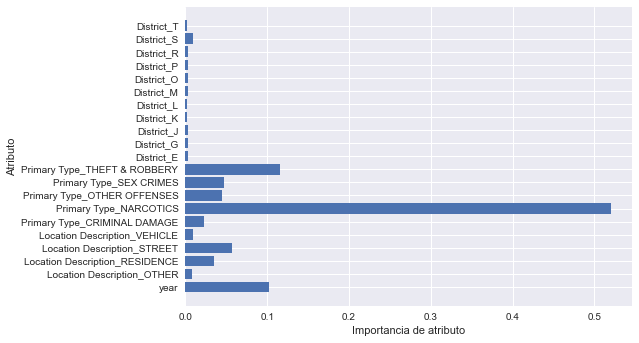

In [179]:
# Mostramos la importancia de cada atributo
n_atributos = len(variables_rf)
plt.barh(range(n_atributos), rf.feature_importances_, align='center')
plt.yticks(np.arange(n_atributos), variables_rf)
plt.xlabel("Importancia de atributo")
plt.ylabel("Atributo")
plt.show();

## Backward Elimination - Stepwise

In [180]:
rfe_feature_selector = RFECV(
    LogisticRegression(solver="liblinear"),
    cv = 5,
    scoring = "neg_log_loss", 
    n_jobs=-1,
).fit(Xrf_train, yrf_train)

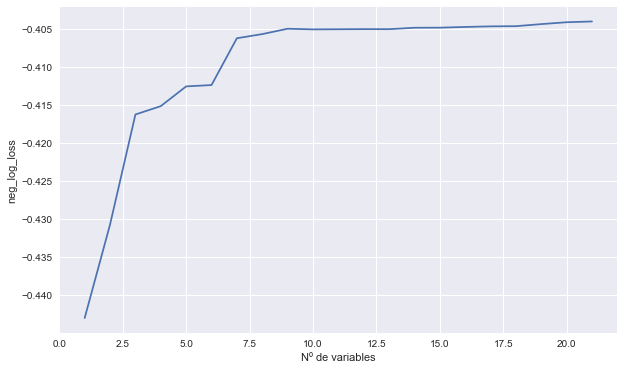

Variables a eliminar:


In [181]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_ylabel("neg_log_loss")
ax.set_xlabel("Nº de variables")
ax.plot(
    [i + 1 for i in range(Xrf_train.shape[1])],
    rfe_feature_selector.grid_scores_
)
plt.show()

print("Variables a eliminar:")
for feature in variables[~rfe_feature_selector.support_]:
  print(f"\t{feature}")

**En este modelo, queremos utilizar también, los métodos de selección de variables para modelos no supervisados.**

- **Queremos darle al estudio un análisis sin tener en cuenta la variable objetivo, viendo que variable depende de ella misma y no de la relación con las demás.**

### Variance Threshold

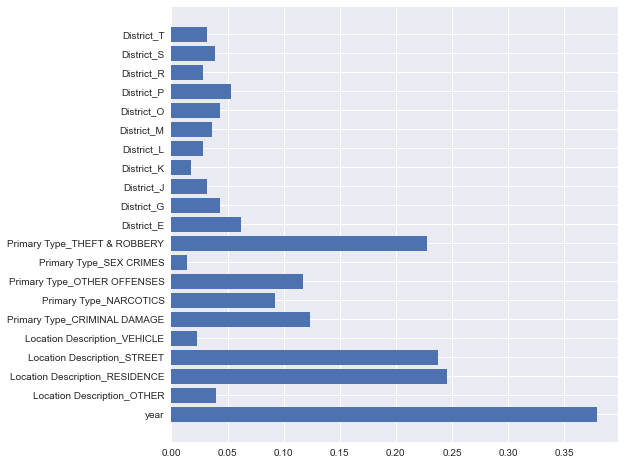

In [182]:
from sklearn.feature_selection import VarianceThreshold

vt_feature_selector = VarianceThreshold(threshold=0.0)
vt_feature_selector.fit(Xrf_train)
fig, ax = plt.subplots(figsize = (8, 8))
ax.barh(variables_rf, vt_feature_selector.variances_)
plt.show()

### Matriz de correlación

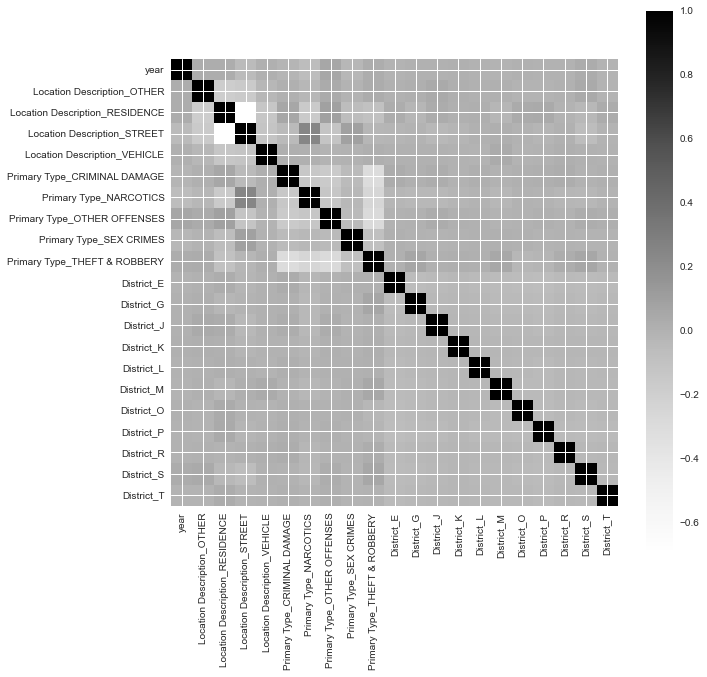

In [183]:
fig, ax = plt.subplots(figsize = (10, 10))
cr_matrix = pd.DataFrame(columns = variables_rf, data = Xrf_train).corr()
im = ax.imshow(cr_matrix)
ax.figure.colorbar(im)
plt.xticks(range(len(variables_rf)), variables_rf, fontsize=10, rotation=90)
plt.yticks(range(len(variables_rf)), variables_rf, fontsize=10, rotation=0)
plt.show()

In [184]:
from scipy.stats import pearsonr

class ColinearityFeatureSelector(object):
  """ Implementa una transformación con el estilo de scikit-learn.
  """

  def __init__(self, threshold = 1.0):
    """ Constructor del objeto.
    Args:
      threshold (float): Umbral que decide si dos variables son colineares. Es
        el coeficiente de correlacion de pearson elevado al cuadrado.
    """
    self.threshold = threshold

  def fit(self, X):
    """ Entrenamiento del transformador.
    Args:
      X(np.Array): Matriz de atributos bidimensional.
    Returns:
      Referencia a sí mismo.
    """
    to_remove = []
    for i in range(X.shape[1]):
      for j in range(i + 1, X.shape[1]):
        r, _ = pearsonr(X[:, i], X[:, j])
        if r**2 >= self.threshold: 
          to_remove.append(j)
    self.support_ = np.array([i not in to_remove for i in range(X.shape[1])])
    return self

  def transform(self, X):
    """ Elimina las variables que se han marcado como colineares.
    Args:
      X(np.Array): Matriz de atributos bidimensional.
    Returns:
      X transformada.
    """
    return X[:, self.support_]

  def fit_transform(self, X):
    """ Entrena, y luego transforma la matriz X.
    Args:
      X(np.Array): Matriz de atributos bidimensional.
    Returns:
      X transformada.
    """
    return self.fit(X).transform(X)

In [185]:
cl_feature_selector = ColinearityFeatureSelector(threshold = 0.9)
cl_feature_selector.fit(Xrf_train)
print("Variables a eliminar:")
for feature in variables_rf[~cl_feature_selector.support_]:
  print(f"\t{feature}")

Variables a eliminar:


### Optimización de hiperparámetros

In [186]:
from sklearn.model_selection import GridSearchCV

np.random.seed(0)

param_grid = {
    "n_estimators": [1, 50, 100],
    "min_samples_split": [2, 30, 60],
    "subsample": [1.0, 0.8, 0.6]
}

grid_search_rf = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid = param_grid,
    cv = 5,
    verbose = 1,
    return_train_score = True,
    scoring = "neg_log_loss",
    n_jobs=-1
).fit(Xrf_train, yrf_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [187]:
extract_results(grid_search_rf)

train_score               test_score  \
                                                mean           var       mean   
min_samples_split n_estimators subsample                                        
2                 1            0.6         -0.555042  1.544608e-08  -0.555053   
                               0.8         -0.555021  1.434760e-08  -0.555024   
                               1.0         -0.555028  2.393608e-08  -0.555032   
                  50           0.6         -0.388686  8.306074e-07  -0.389359   
                               0.8         -0.388177  1.281400e-06  -0.388627   
                               1.0         -0.389176  2.287719e-06  -0.389580   
                  100          0.6         -0.377571  2.912625e-06  -0.378951   
                               0.8         -0.377479  8.738857e-07  -0.378910   
                               1.0         -0.378675  2.394848e-06  -0.379947   
30                1            0.6         -0.555034  4.777510e-08  -0.555043   
                               0.8         -0.555034  2.208890e-08  -0.555048   
                               1.0         -0.555028  2.393608e-08  -0.555032   
                  50           0.6         -0.388385  5.525300e-06  -0.389133   
                               0.8         -0.388900  7.804864e-07  -0.389430   
                               1.0         -0.389176  2.287719e-06  -0.389580   
                  100          0.6         -0.377056  2.269012e-06  -0.378603   
                               0.8         -0.377527  3.927946e-07  -0.378928   
                               1.0         -0.378706  2.430607e-06  -0.379964   
60                1            0.6         -0.555011  2.083651e-08  -0.555005   
                               0.8         -0.555047  2.696966e-08  -0.555050   
                               1.0         -0.555028  2.393608e-08  -0.555032   
                  50           0.6         -0.387760  5.306982e-06  -0.388317   
                               0.8         -0.388849  5.664443e-06  -0.389351   
                               1.0         -0.389176  2.287719e-06  -0.389580   
                  100          0.6         -0.376814  1.716845e-06  -0.378297   
                               0.8         -0.377739  4.849022e-07  -0.379192   
                               1.0         -0.378706  2.430607e-06  -0.379964   

                                                        
                                                   var  
min_samples_split n_estimators subsample                
2                 1            0.6        2.587628e-07  
                               0.8        2.550815e-07  
                               1.0        2.166176e-07  
                  50           0.6        1.122194e-05  
                               0.8        2.154177e-05  
                               1.0        1.207455e-05  
                  100          0.6        1.689408e-05  
                               0.8        1.005364e-05  
                               1.0        9.608195e-06  
30                1            0.6        1.873484e-07  
                               0.8        2.921800e-07  
                               1.0        2.166176e-07  
                  50           0.6        1.619539e-05  
                               0.8        1.241805e-05  
                               1.0        1.207455e-05  
                  100          0.6        1.025430e-05  
                               0.8        1.297563e-05  
                               1.0        9.537218e-06  
60                1            0.6        2.578278e-07  
                               0.8        2.179895e-07  
                               1.0        2.166176e-07  
                  50           0.6        5.659076e-06  
                               0.8        7.505515e-06  
                               1.0        1.207455e-05  
                  100          0.6        9.706343e-06  
              

In [188]:
print(f"Mejores parámetros: {grid_search_rf.best_params_}")
print(f"Mejor resultado: {grid_search_rf.best_score_:.3f}")

Mejores parámetros: {'min_samples_split': 60, 'n_estimators': 100, 'subsample': 0.6}
Mejor resultado: -0.378


## Evaluación final del Random Forest

In [189]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss

pipeline = Pipeline([
    ("variance", vt_feature_selector),
  ("colinear", cl_feature_selector),
  ("rfe", rfe_feature_selector),
  ("estimator", grid_search)                      
])

In [191]:
yrf_test_pred = pipeline.predict_proba(Xrf_test)
print(f"Log loss test: {log_loss(yrf_test, yrf_test_pred):.3f}")

Log loss test: 0.406
